# Test création de i(q) sans puis avec boucle
## Rolland Tristan 13/06/24


**Contenu** :
- Introduction
- 2 eme case : def de la fonction clean
- 3 eme case : code pour creer I(q) uniquement (sans garder le fichier xyz associé)
- 4 eme case  : code pour ceer plusieur I(q) avec une boucle avec exemple de Au sphère

C:\Users\rollan\Documents\notebook\pyNanoMatBuilder-main\pyNanoMatBuilder-main



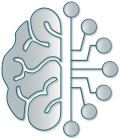

**Start at:** Friday 21 June 2024, 15:29:37  
**Hostname:** insa-20188 (Windows)

<p style="text-align: center"><img width="800px" src="./styles/svg/pyNanoMatBuilder_banner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './styles/'
sys.path.append(cwd0)

import visualID as vID
from visualID import  fg, hl, bg
vID.init(cwd0)

import numpy as np
import ase
from ase.io import write
from ase.visualize import view

import pyNanoMatBuilder.utils as pNMBu
import importlib
from matplotlib import pyplot as plt
import torch


In [2]:
def clean_xyz(filename):
    dtype = {'names': ('element', 'x', 'y', 'z'),
             'formats': ('U2', float, float, float)}    
    element,x,y,z=np.loadtxt(filename,unpack=True,skiprows=2 , usecols=(0, 1, 2, 3), dtype=dtype)
    outfile=os.path.dirname(filename)+'/'+os.path.basename(filename).split('.')[0]+'_forDebyeCalc.xyz'
    nb_atoms=len(x)
    line2write=str(nb_atoms)+'\n'
    line2write+='\n'
    for i in range(nb_atoms):
        line2write+=str(element[i])+'\t %.8f'%x[i] + '\t %.8f'%y[i] + '\t %.8f'%z[i] +'\n'
    with open(outfile,'w') as file:
        file.write(line2write)
    return outfile

In [9]:
#a sup

C:\Users\rollan\Documents\notebook\pyNanoMatBuilder-main\pyNanoMatBuilder-main



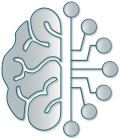

**Start at:** Monday 24 June 2024, 12:11:18  
**Hostname:** insa-20188 (Windows)

<p style="text-align: center"><img width="800px" src="./styles/svg/pyNanoMatBuilder_banner.svg" style="margin-left:auto; margin-right:auto"/></p>

<module 'pyNanoMatBuilder.utils' from 'C:\\Users\\rollan\\Documents\\notebook\\pyNanoMatBuilder-main\\pyNanoMatBuilder-main\\pyNanoMatBuilder\\utils.py'>

In [4]:
##################
# Initialization #
##################

import os
import sys

print(os.getcwd())
cwd0 = './styles/'
sys.path.append(cwd0)

import visualID as vID
from visualID import  fg, hl, bg
vID.init(cwd0)

import numpy as np
import ase
from ase.io import write
from ase.visualize import view

import pyNanoMatBuilder.utils as pNMBu
import importlib
import pandas as pd

from pyNanoMatBuilder import platonicNPs as pNP

import importlib
importlib.reload(pNP)
importlib.reload(pNMBu)

In [10]:
#a sup

Regular icosahedron with 2 shell(s) and Rnn = 2.356


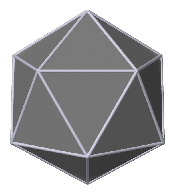

element =  Au
number of vertices =  12
number of edges =  30
number of faces =  20
phi =  1.618033988749895
intershell factor = 1.05
nearest neighbour distance = 2.36 Å
intershell distance = 2.24 Å
edge length = 0.47 nm
radius after volume = 0.38 nm
radius of the circumscribed sphere = 0.45 nm
radius of the inscribed sphere = 0.36 nm
area = 1.9 nm2
volume = 0.2 nm3
number of atoms per shell =  [1, 12, 42]
cumulative number of atoms per shell =  [1, 13, 55]
total number of atoms =  55
Dual polyhedron: dodecahedron


Total number of atoms = 55
[1, 12, 42]
Duration : 00:00:00 000ms


Moments of inertia = 96802.73 96802.73 96802.73 amu.Å2
Moments of inertia / M = 8.94 8.94 8.94 amu.Å2
Size of the ellipsoid = 1.34 1.34 1.34 nm


Found:
  - 12 vertices
  - 20 simplices
Duration : 00:00:00 000ms


42 atoms lie in the plane(s)
Duration : 00:00:00 016ms
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


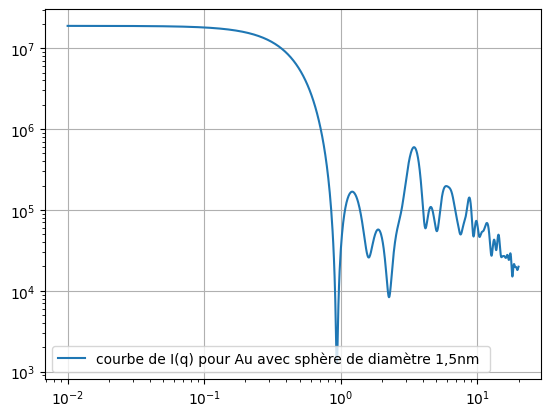

In [7]:
## Code pour creer uniquement la courbe I(q)

###### Création d'un fichier xyz 

from pyNanoMatBuilder import crystalNPs as cyNP
importlib.reload(cyNP)
importlib.reload(pNMBu)


ico = pNP.regIco("Au",2.356,2,thresholdCoreSurface=1,skipSymmetryAnalyzis=True)
write("stage/test_fichier_xyz_avec_la_fonction_clean/sphere_AuNP_1,5nm.xyz", ico.NP)


###### Clean du fichier xyz
xyz_file="stage/test_fichier_xyz_avec_la_fonction_clean/sphere_AuNP_1,5nm.xyz"
xyz_file=clean_xyz(xyz_file)

###### Calcul de I(q)

from debyecalculator import DebyeCalculator
calc = DebyeCalculator(qmin=0.01,qmax=20,qstep=0.01,device='cpu',biso=0.01)
Q, I = calc.iq(structure_source=xyz_file)

print(type(Q))
print(type(I))
###### Tracer de I(q)
plt.figure()
plt.loglog(Q,I,label='courbe de I(q) pour Au avec sphère de diamètre 1,5nm ')
plt.grid()
plt.legend()
plt.show()


#####supression du fichier xyz pour garder seulement le nom
os.remove("stage/test_fichier_xyz_avec_la_fonction_clean/sphere_AuNP_1,5nm.xyz")


cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


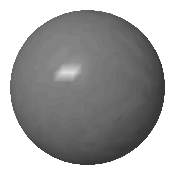

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1.5 nm


Making a 10x10x10 supercell
Center of Mass: ['19.37', '19.37', '19.37']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 4000
Duration : 00:00:00 000ms


Duration : 00:00:00 031ms
Total number of atoms = 820


Moments of inertia = 14370052.12 14370052.12 14370052.12 amu.Å2
Moments of inertia / M = 88.97 88.97 88.97 amu.Å2
Size of the ellipsoid = 4.22 4.22 4.22 nm


Found:
  - 108 vertices
  - 212 simplices
Duration : 00:00:00 000ms


276 atoms lie in the plane(s)
Duration : 00:00:01 718ms


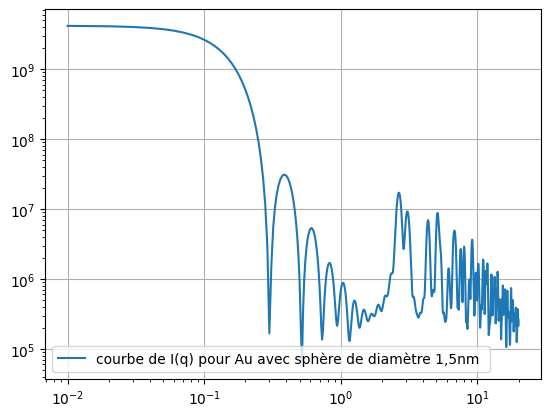

In [3]:
## Code pour creer uniquement la courbe I(q)

###### Création d'un fichier xyz 

from pyNanoMatBuilder import crystalNPs as cyNP
importlib.reload(cyNP)
importlib.reload(pNMBu)

AuNP = cyNP.Crystal("Au",size=[1.5],thresholdCoreSurface=1,skipSymmetryAnalyzis=True)
write("stage/test_fichier_xyz_avec_la_fonction_clean/sphere_AuNP_1,5nm.xyz", AuNP.NP)

###### Clean du fichier xyz
xyz_file="stage/test_fichier_xyz_avec_la_fonction_clean/sphere_AuNP_1,5nm.xyz"
xyz_file=clean_xyz(xyz_file)

###### Calcul de I(q)

from debyecalculator import DebyeCalculator
calc = DebyeCalculator(qmin=0.01,qmax=20,qstep=0.01,device='cpu',biso=0.01)
Q, I = calc.iq(structure_source=xyz_file)

###### Tracer de I(q)
plt.figure()
plt.loglog(Q,I,label='courbe de I(q) pour Au avec sphère de diamètre 1,5nm ')
plt.grid()
plt.legend()
plt.show()


#####supression du fichier xyz pour garder seulement le nom
os.remove("stage/test_fichier_xyz_avec_la_fonction_clean/sphere_AuNP_1,5nm.xyz")




cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


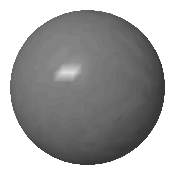

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 021ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 116ms


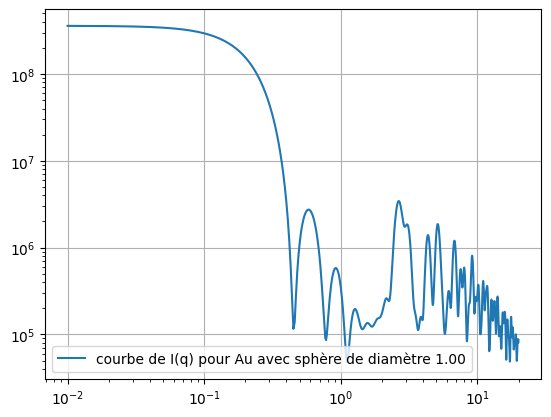

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


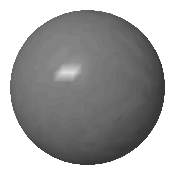

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 016ms


Duration : 00:00:00 000ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


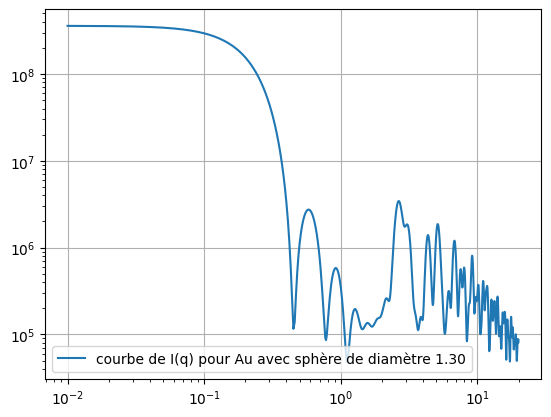

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


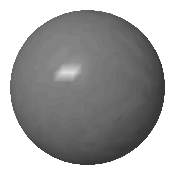

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 016ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 016ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


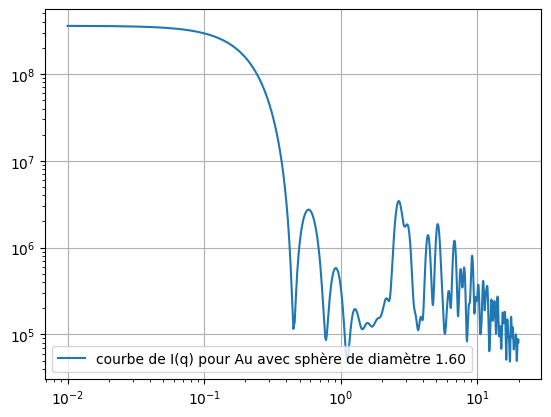

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


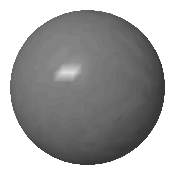

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 016ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


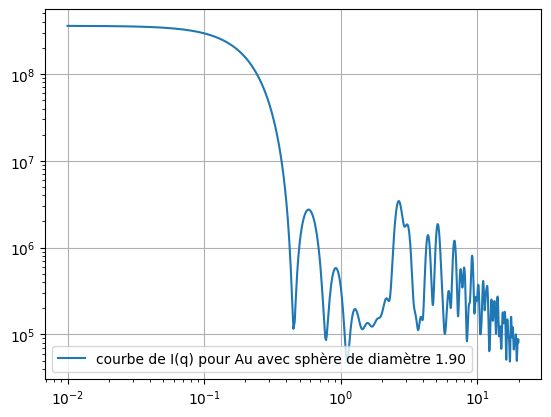

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


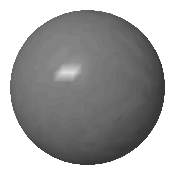

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 000ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


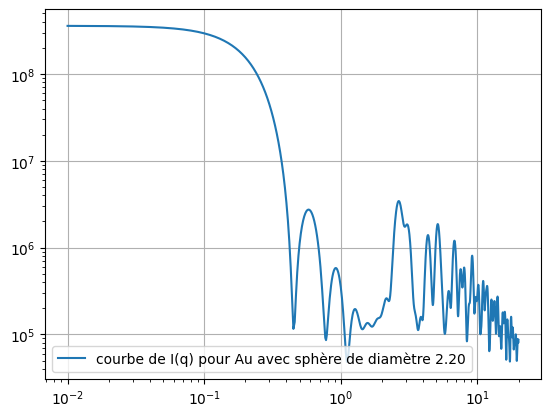

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


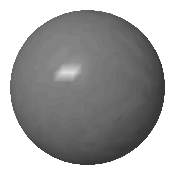

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 016ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


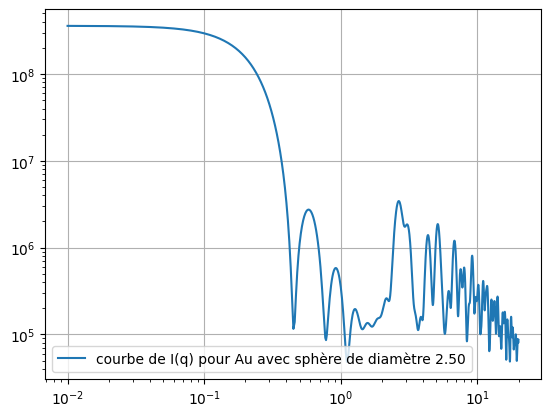

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


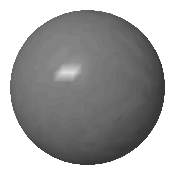

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 016ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 016ms


112 atoms lie in the plane(s)
Duration : 00:00:00 107ms


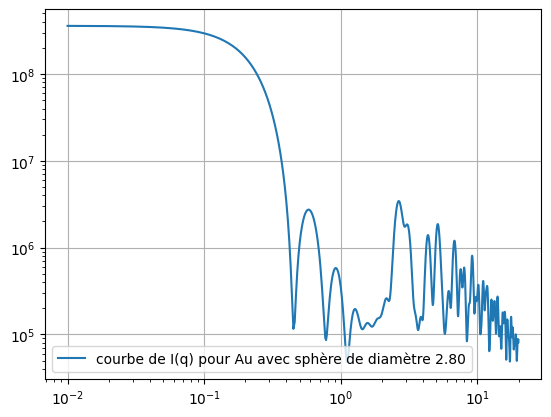

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


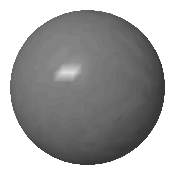

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 000ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 007ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


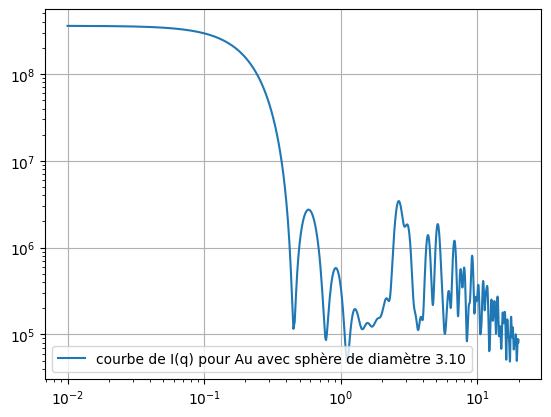

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


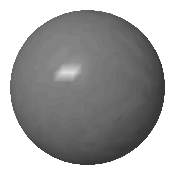

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 016ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


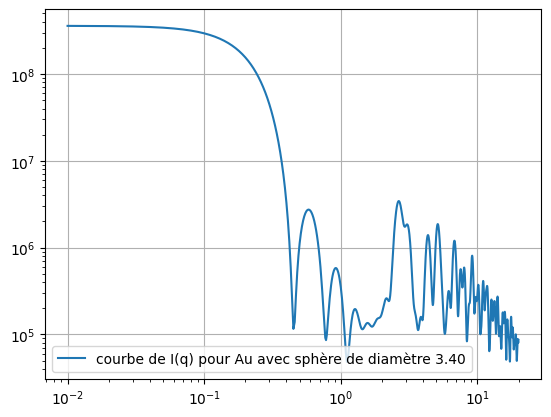

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


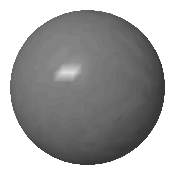

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 016ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 007ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


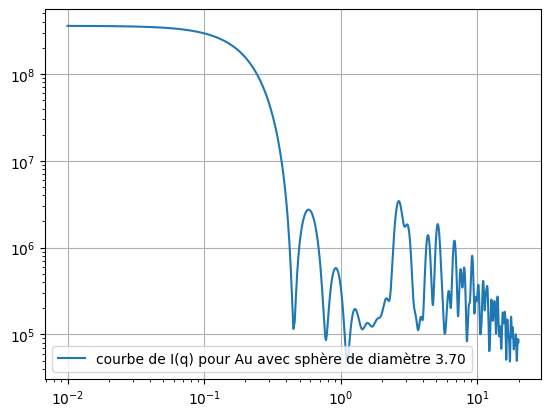

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


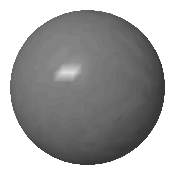

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 000ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 116ms


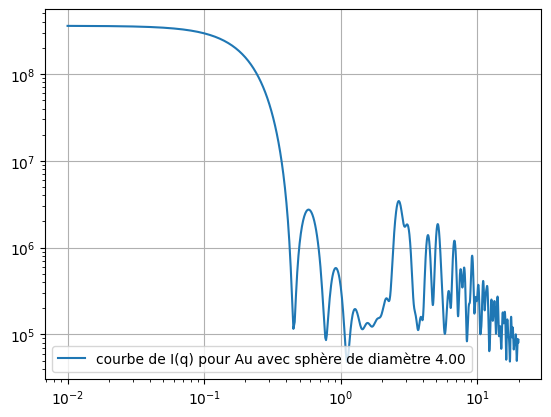

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


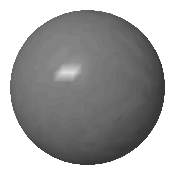

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 000ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 016ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


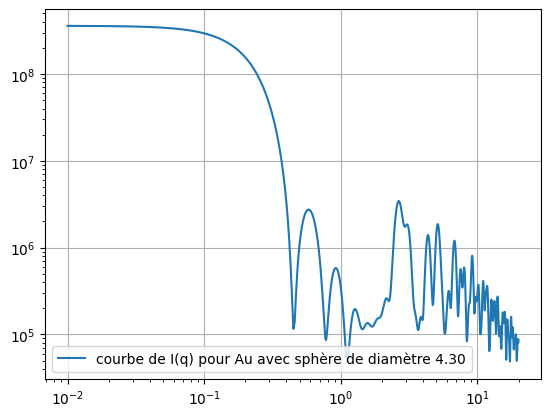

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


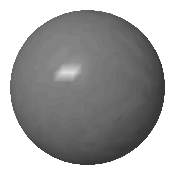

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 000ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 007ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


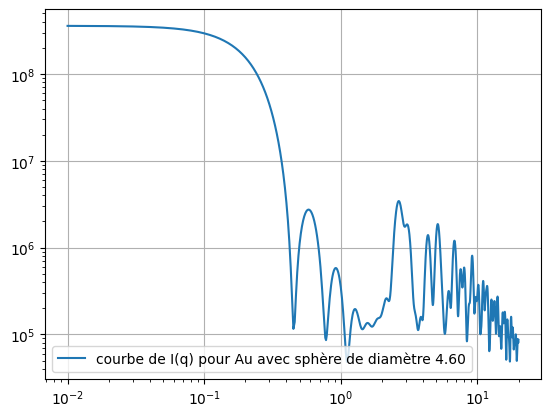

cif parameters for Au found in cod9008463_Au_fcc.cif
Crystal = Au sphere


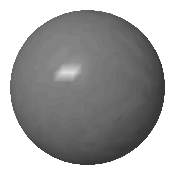

Bravais lattice: CUB(a=4.07825)
Chemical formula: Au4
Crystal family = cubic (lattice system = cubic)
Name = primitive cubic (Pearson symbol = cP)
Variant names = ['CUB']

From ase: space group number = 225      Hermann-Mauguin symbol for the space group = F m -3 m

a: 4.078 Å, b: 4.078 Å, c: 4.078 Å. (c/a = 1.000)
α: 90.000 °, β: 90.000 °, γ: 90.000 °

Volume: 67.830 Å3


Sphere radius = 1 nm


Making a 6x6x6 supercell
Center of Mass: ['11.22', '11.22', '11.22']  Å
Now translating the supercell
Center of Mass after translation of the supercell: [-1.0195625 -1.0195625 -1.0195625] Å
Total number of atoms = 864
Duration : 00:00:00 000ms


Duration : 00:00:00 016ms
Total number of atoms = 240


Moments of inertia = 1854200.27 1854200.27 1854200.27 amu.Å2
Moments of inertia / M = 39.22 39.22 39.22 amu.Å2
Size of the ellipsoid = 2.80 2.80 2.80 nm


Found:
  - 48 vertices
  - 92 simplices
Duration : 00:00:00 000ms


112 atoms lie in the plane(s)
Duration : 00:00:00 100ms


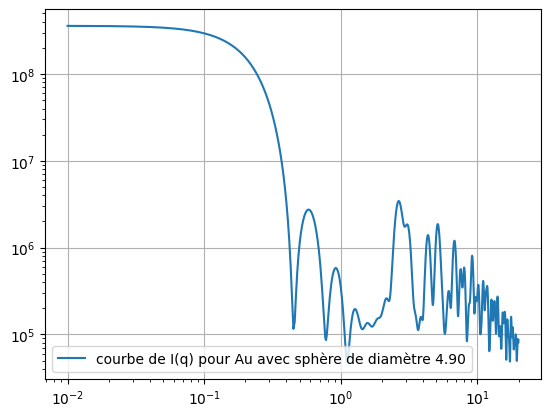

In [5]:
### création d'une banque de donnée de I(q) avec seulement l'exemple de Au sphère


from pyNanoMatBuilder import crystalNPs as cyNP
importlib.reload(cyNP)
importlib.reload(pNMBu)


N = np.arange(1,2.5,0.3) 

for i in N: 
    AuNP = cyNP.Crystal("Au",size=[1],thresholdCoreSurface=1,skipSymmetryAnalyzis=True)
    write("stage/création_des_I(q)_pour_Au_sphere/sphere_AuNP_%.2f"%i+"nm.xyz", AuNP.NP)

    ###### Clean du fichier xyz
    xyz_file="stage/création_des_I(q)_pour_Au_sphere/sphere_AuNP_%.2f"%i+"nm.xyz"
    xyz_file=clean_xyz(xyz_file)

    ###### Calcul de I(q)

    from debyecalculator import DebyeCalculator
    calc = DebyeCalculator(qmin=0.01,qmax=20,qstep=0.01,device='cpu',biso=0.01)
    Q, I = calc.iq(structure_source=xyz_file)

    ###### Tracer de I(q)
    plt.figure()
    plt.loglog(Q,I,label='courbe de I(q) pour Au avec sphère de diamètre %.2f'%i)
    plt.grid()
    plt.legend()
    plt.show()

    ###### supression du fichier xyz pour garder seulement le nom
    os.remove("stage/création_des_I(q)_pour_Au_sphere/sphere_AuNP_%.2f"%i+"nm.xyz")
    

    

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<class 'list'>
